In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in the class.


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_scatter(r):
    """Generate a scatter plot with a correlation approximately r"""
    plots.figure(figsize=(5,5))
    x, y = make_correlated_data(r)
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    
def r_table(r):
    """
    Generate a table of 1000 data points with a correlation approximately r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

## Correlation ##

In [4]:
hybrid = Table.read_table('hybrid.csv')
suv = hybrid.where('class', 'SUV').drop('class', 'year')

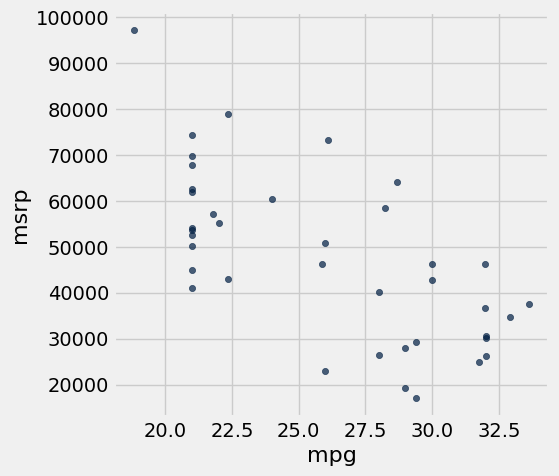

In [5]:
suv.scatter('mpg', 'msrp')

In [6]:
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

In [7]:
# Convert MPG and MSRP columns to standard units
# and put them back in the table.

mpg = suv.column('mpg')
msrp = suv.column('msrp')

suv = suv.with_columns(
    'mpg in standard units', standard_units(mpg),
    'msrp in standard units', standard_units(msrp),
)

In [8]:
def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)

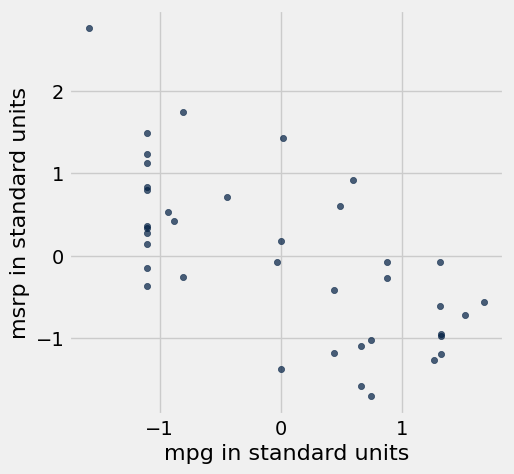

In [9]:
suv.scatter('mpg in standard units', 'msrp in standard units')

In [ ]:
suv

### Correlation coefficient: r

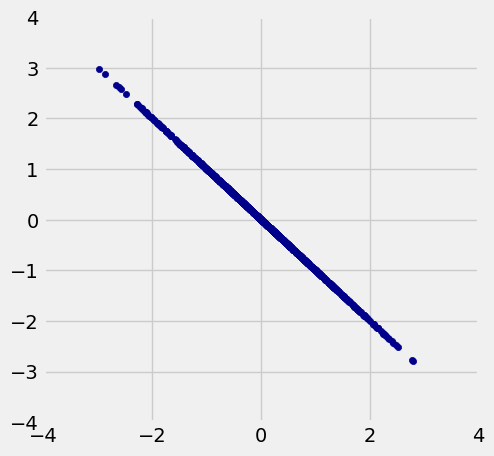

In [10]:
r_scatter(-1)

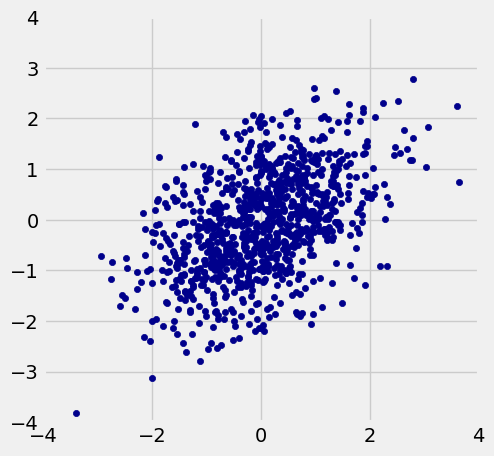

In [11]:
r_scatter(0.5)

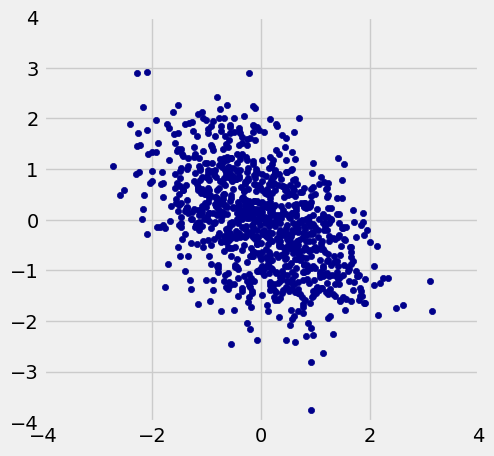

In [12]:
r_scatter(-0.5)

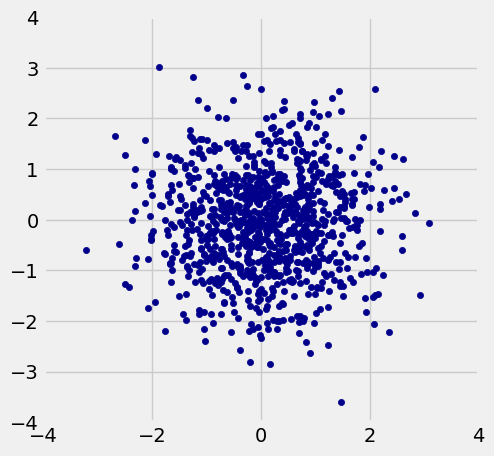

In [13]:
r_scatter(0)

### Nonlinearity ###

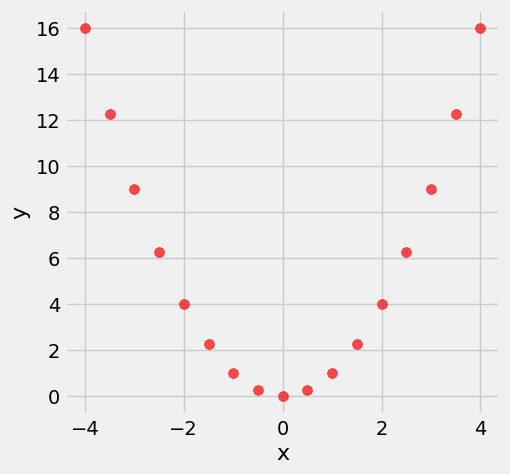

In [14]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=50, color='r')

In [15]:
correlation(nonlinear, 'x', 'y')

0.0

### Outliers ###

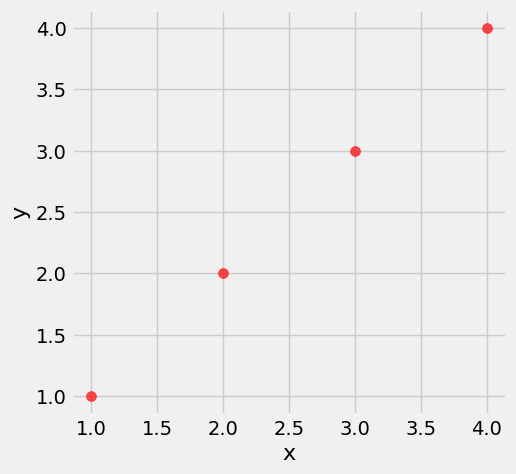

In [16]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=50, color='r')

In [17]:
correlation(line, 'x', 'y')

1.0

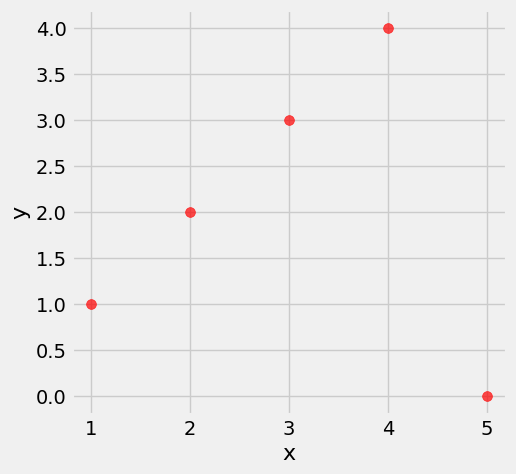

In [18]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=50, color='r')

In [19]:
correlation(outlier, 'x', 'y')

0.0

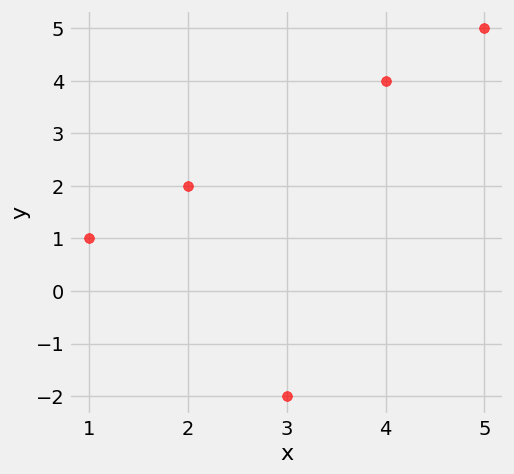

In [20]:
outlier2 = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, -2, 4, 5)
    )
outlier2.scatter('x', 'y', s=50, color='r')

In [21]:
correlation(outlier2, 'x', 'y')

0.57735026918962584

### Ecological correlations

In [22]:
election16 = Table.read_table('election2016_state.csv')
election16

State,Median Income,Percent voting for Clinton
Alabama,47221,0.343579
Alaska,75723,0.365509
Arizona,57100,0.45126
Arkansas,45907,0.336519
California,66637,0.617264
Colorado,70566,0.481565
Connecticut,75923,0.545663
Delaware,58046,0.53086
Florida,51176,0.478233
Georgia,53527,0.4564


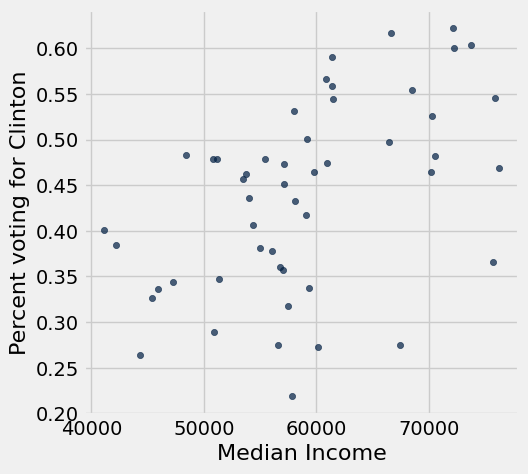

In [23]:
election16.scatter('Median Income', 'Percent voting for Clinton')

In [25]:
correlation(election16, 'Median Income', 'Percent voting for Clinton')

0.49340726879730662

In [24]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014.show(4)

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698


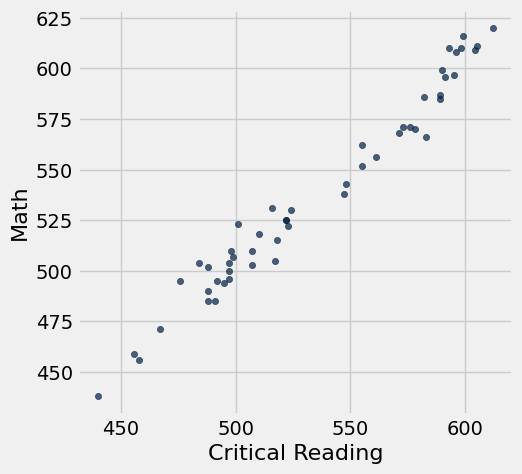

In [26]:
sat2014.scatter('Critical Reading', 'Math')

In [ ]:
correlation(sat2014, 'Critical Reading', 'Math')

## Prediction lines

In [28]:
example = r_table(0.99)
example.show(3)

x,y
0.0912047,-0.0680119
1.09128,1.04391
-1.94697,-1.88316


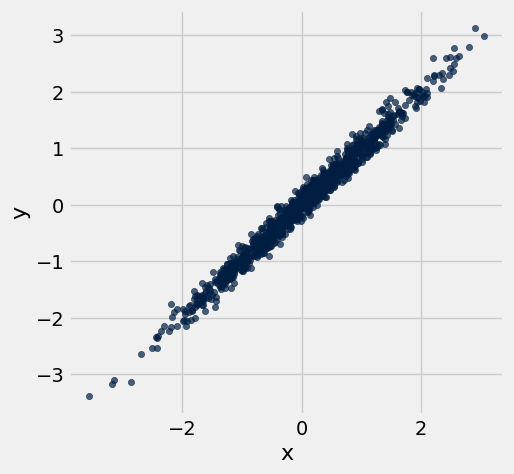

In [29]:
example.scatter('x', 'y')

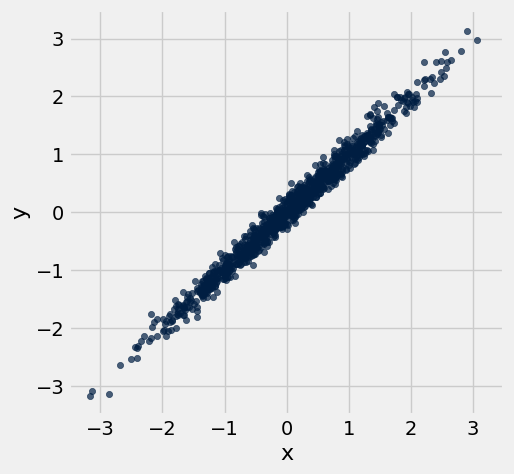

In [30]:
example.scatter('x', 'y')
resize_window()

In [31]:
def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
    return np.mean(neighbors.column('y'))
    

In [34]:
nn_prediction_example(-2.25)

-2.1476337989800522

In [35]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

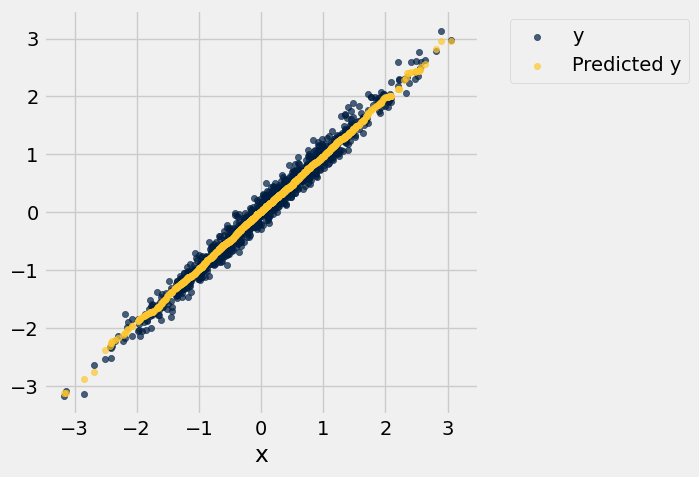

In [36]:
example.scatter('x')
resize_window()

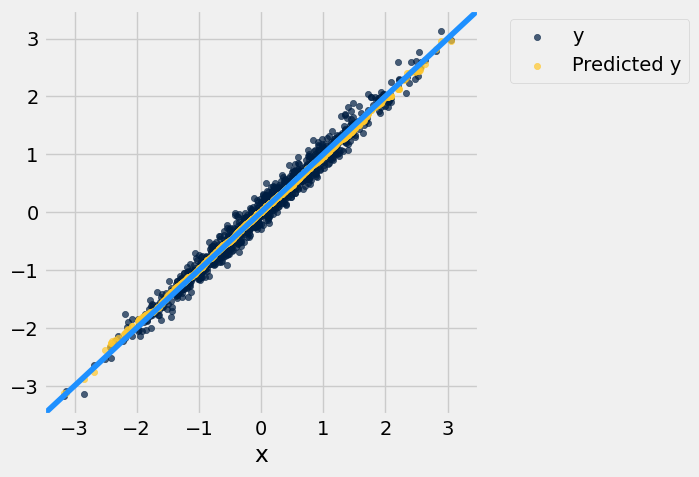

In [37]:
example.scatter('x')
draw_line(slope=1, color='dodgerblue')
resize_window()

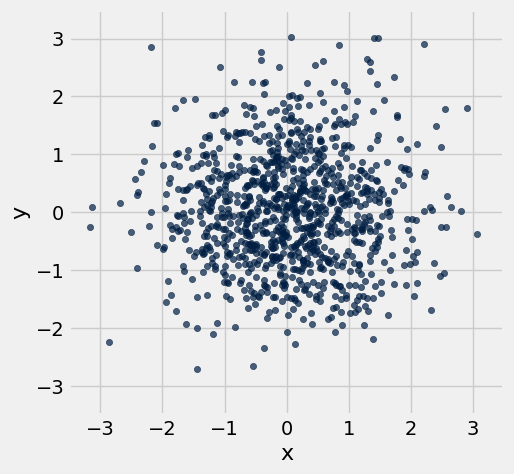

In [38]:
example = r_table(0)
example.scatter('x', 'y')
resize_window()

In [39]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

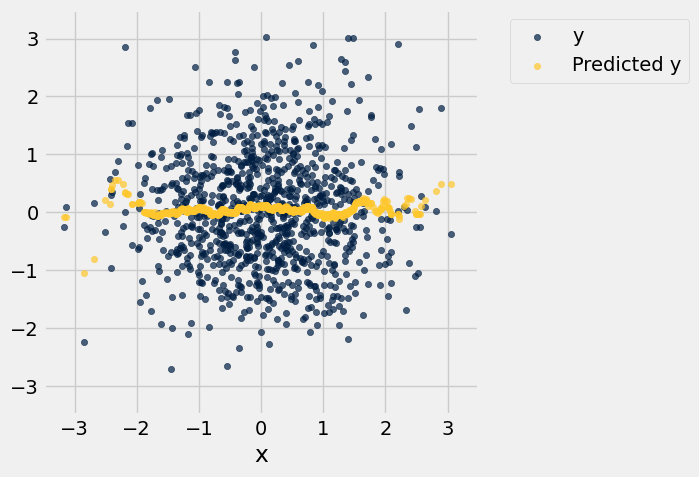

In [40]:
example = example.with_column(
    'Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
#draw_line(slope = 0)
resize_window()

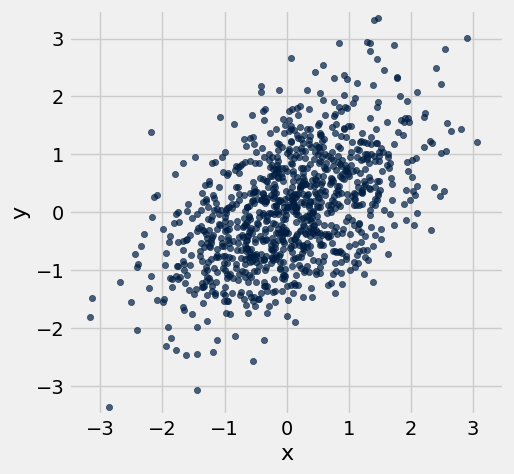

In [41]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()

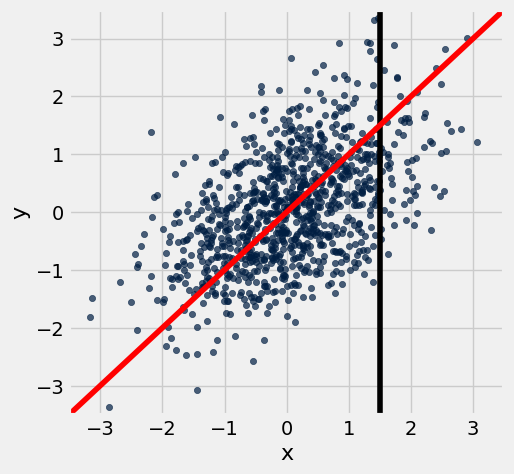

In [42]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()
draw_vertical_line(1.5)
draw_line(slope=1, intercept=0)

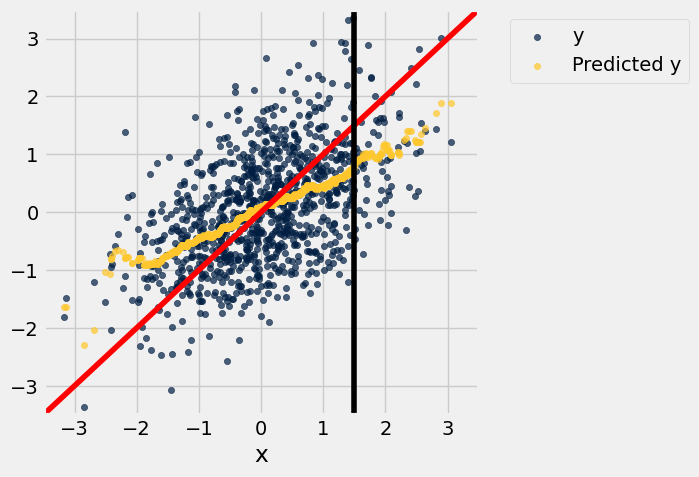

In [43]:
example = example.with_column('Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=1)
draw_vertical_line(1.5)
resize_window()

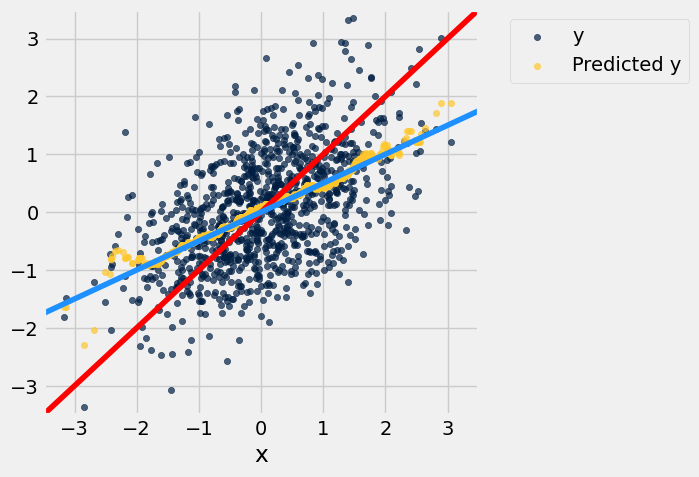

In [44]:
example.scatter('x')
draw_line(slope=1, intercept=0, color='red')
draw_line(slope=0.5, intercept=0, color='dodgerblue')
resize_window()

## Linear regression: defining the line

In [45]:
# Copy-pasted from above
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)


In [46]:
def slope(t, x, y):
    return correlation(t,x,y) * (np.std(t.column(y)) / np.std(t.column(x)))

def intercept(t, x, y):
    return np.mean(t.column(y)) - slope(t,x,y) * np.mean(t.column(x))

In [47]:
example = r_table(0.5)
slope(example, 'x', 'y')

0.50226382816259152

## Galton height data

In [48]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight'))
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [52]:
def nn_prediction_galton(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    neighbors = heights.where(
        'MidParent', are.between(h - 0.5, h + 0.5))
    return np.mean(neighbors.column('Child'))

In [53]:
heights_with_predictions = heights.with_column(
    'Average neighbor prediction', 
    heights.apply(nn_prediction_galton, 'MidParent'))

In [49]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.63736089696947895, 22.636240549589751)

In [50]:
heights.take(123)

MidParent,Child
69.48,71.5


In [ ]:
### Make prediction for child height


In [54]:
heights_with_predictions.where('MidParent', are.equal_to(69.48))

MidParent,Child,Average neighbor prediction
69.48,64,66.7588
69.48,74,66.7588
69.48,72,66.7588
69.48,69,66.7588
69.48,67.5,66.7588
69.48,63.5,66.7588
69.48,72,66.7588
69.48,71.5,66.7588
69.48,71.5,66.7588
69.48,70,66.7588


In [55]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', 
    galton_slope*heights.column('MidParent') + galton_intercept
)
heights_with_predictions

MidParent,Child,Average neighbor prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


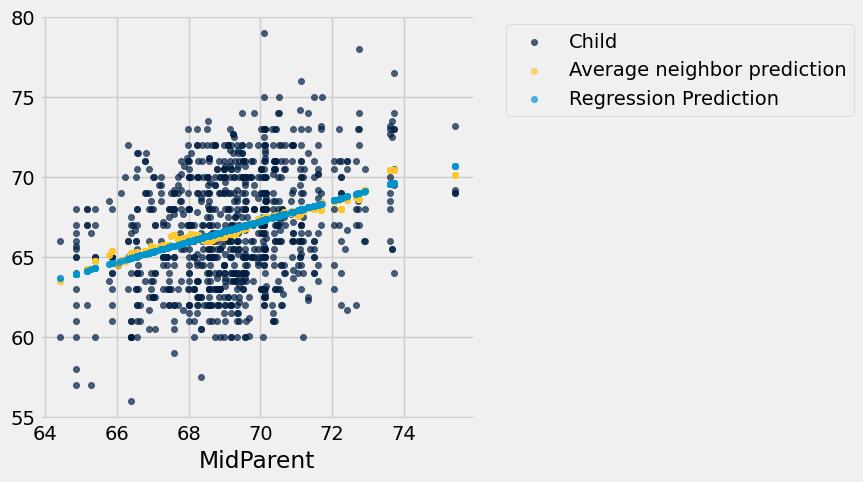

In [56]:
heights_with_predictions.scatter('MidParent')

### Regression line vs other lines

In [57]:
def demographics_errors(slope, intercept):
    # Use four convenient points from the original data
    sample = [[14.7, 33995], [19.1, 61454], [50.7, 71183], [59.5, 105918]]
    demographics.scatter('College%', 'Median Income', alpha=0.5)
    xlims = make_array(5, 75)
    # Plot a line with the slope and intercept you specified:
    plots.plot(xlims, slope * xlims + intercept, lw=4)
    # Plot red lines from each of the four points to the line
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=4)

In [58]:
def fitted_values(t, x, y):
    """Return an array of the regressions estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

In [59]:
demographics = Table.read_table('district_demographics2016.csv')
demographics.show(5)

State,District,Median Income,Percent voting for Clinton,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,34.1,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,33,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,32.3,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17.4,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,31.3,30.3


In [60]:
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


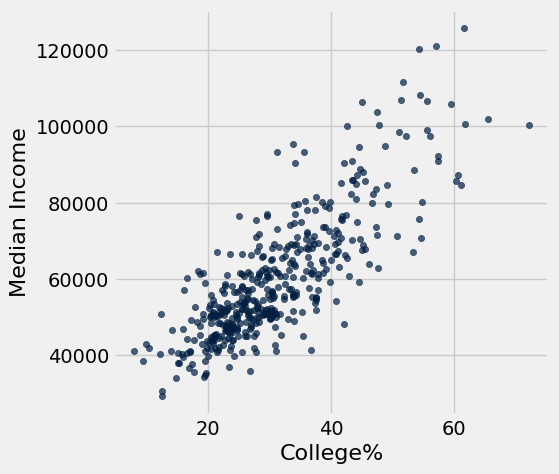

In [61]:
demographics.scatter('College%', 'Median Income')

In [62]:
correlation(demographics, 'College%', 'Median Income')

0.81846485171413352

In [63]:
regression_slope = slope(demographics, 'College%', 'Median Income')
regression_intercept = intercept(demographics, 'College%', 'Median Income')
regression_slope, regression_intercept

(1270.70168946388, 20802.577766677925)

In [64]:
predicted = fitted_values(demographics, 'College%', 'Median Income')

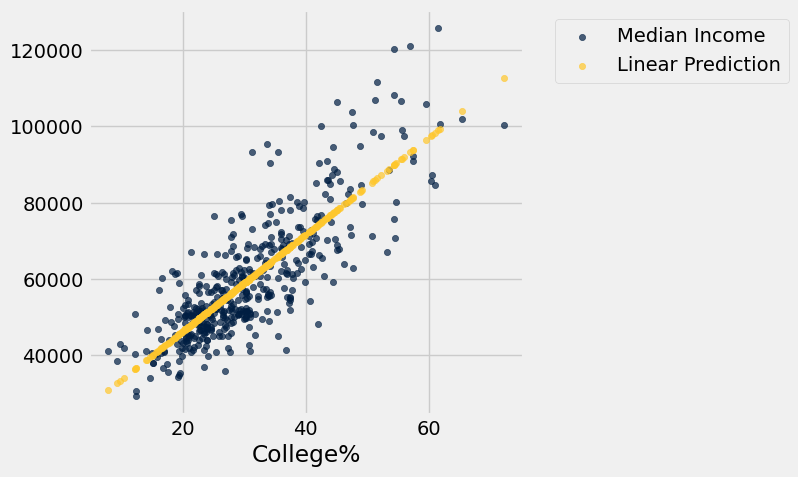

In [65]:
demographics = demographics.with_column(
    'Linear Prediction', predicted)
demographics.scatter('College%')

In [66]:
actual = demographics.column('Median Income')
errors = actual - predicted

In [67]:
demographics.with_column('Error', errors)

Median Income,College%,Linear Prediction,Error
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


In [68]:
np.mean(errors)

6.3560089503211536e-13

In [80]:
np.mean(errors ** 2) ** 0.5

9398.5155885712811

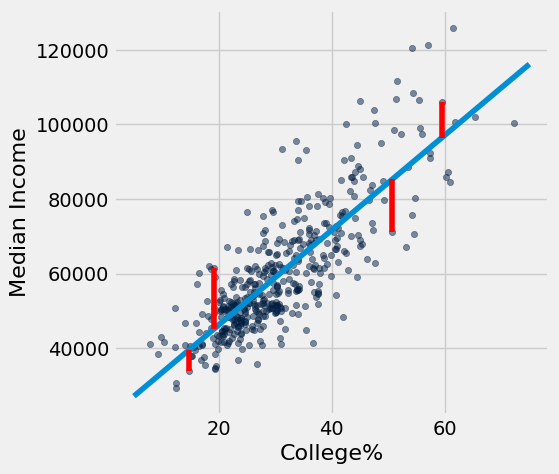

In [70]:
demographics_errors(regression_slope, regression_intercept)

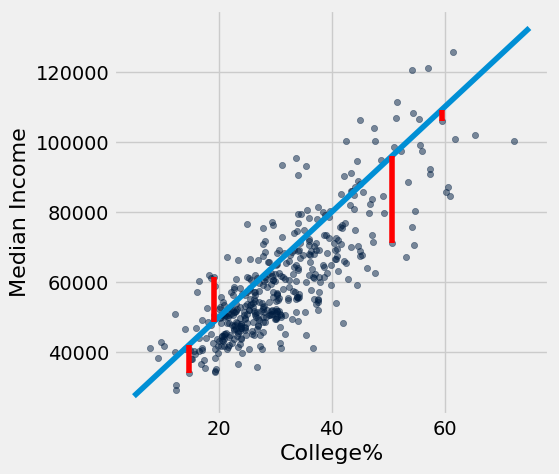

In [71]:
# takes any slope, any intercept

demographics_errors(1500, 20000)

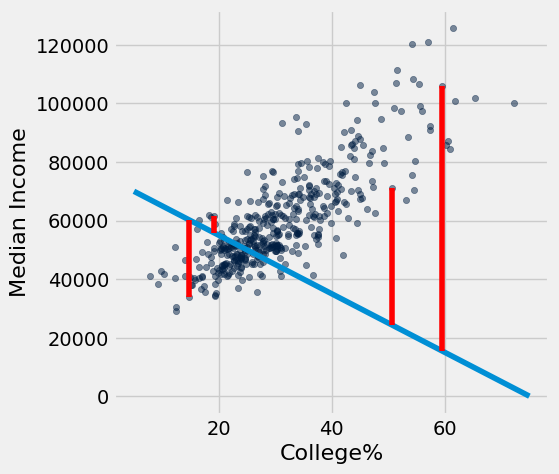

In [72]:
demographics_errors(-1000, 75000)

### Root Mean Square Error ###

In [73]:
def show_demographics_rmse(slope, intercept):
    demographics_errors(slope, intercept)
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    prediction = slope * x + intercept
    mse = np.mean((y - prediction) ** 2)
    print("Root mean squared error:", round(mse ** 0.5, 2))

Root mean squared error: 30247.88


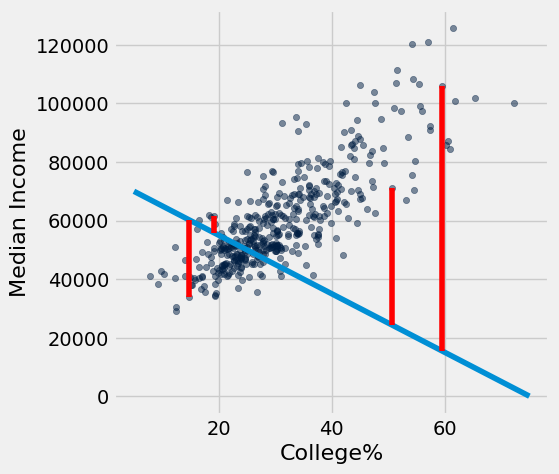

In [74]:
show_demographics_rmse(-1000, 75000)

Root mean squared error: 11559.09


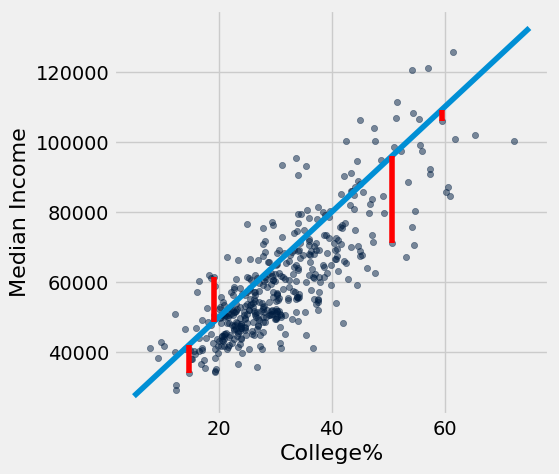

In [75]:
show_demographics_rmse(1500, 20000)

In [ ]:
show_demographics_rmse(regression_slope, regression_intercept)

### Numerical Optimization ###

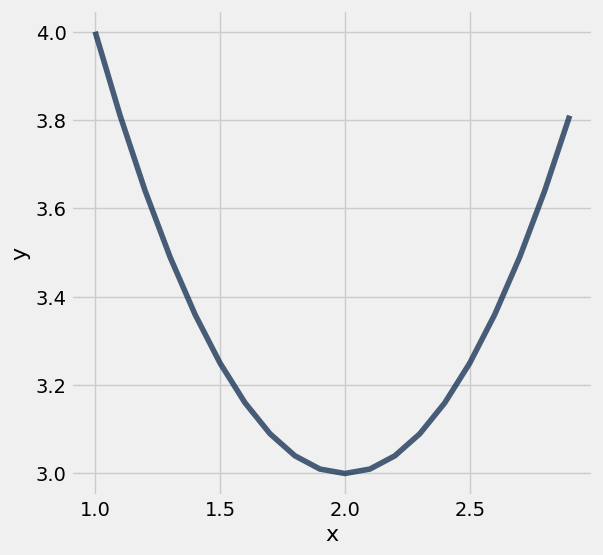

In [76]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_columns('x', x, 'y', y).plot('x')

In [78]:
def f(x):
    return ((x-2)**2) + 3

In [79]:
minimize(f)

1.9999999946252267

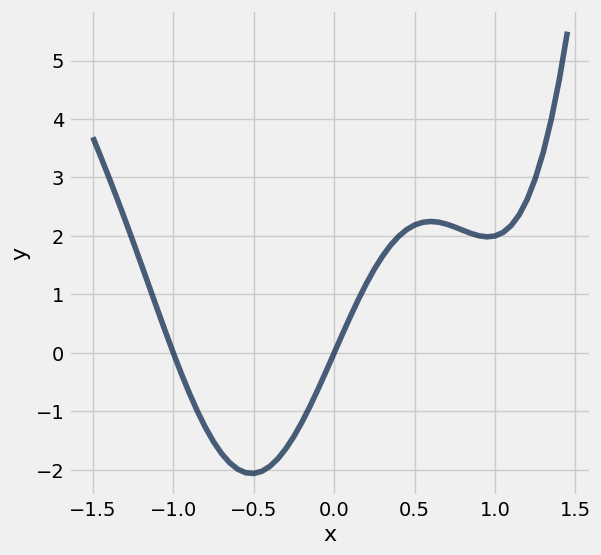

In [81]:
x = np.arange(-1.5, 1.5, 0.05)
y2 = 2 * np.sin(x*np.pi) + x ** 3 + x ** 4 
Table().with_columns('x', x, 'y', y2).plot('x')

In [82]:
def complicated_function(x):
    return 2 * np.sin(x*np.pi) + x ** 3 + x ** 4 

In [83]:
minimize(complicated_function)

-0.5126437706400124

### Minimizing RMSE ###

In [84]:
def demographics_rmse(any_slope, any_intercept):
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

In [85]:
demographics_rmse(1500, 20000)

11559.086490075999

In [86]:
demographics_rmse(-1000, 75000)

30247.883767944502

In [87]:
minimize(demographics_rmse)

array([  1270.70168805,  20802.57933807])

In [88]:
make_array(regression_slope, regression_intercept)

array([  1270.70168946,  20802.57776668])

### Nonlinear Regression ###

In [89]:
shotput = Table.read_table('shotput.csv')
shotput

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4
61.3,13
63.6,13.2
66.1,13
70,12.7
92.7,13.9
90.5,15.5
90.5,15.8


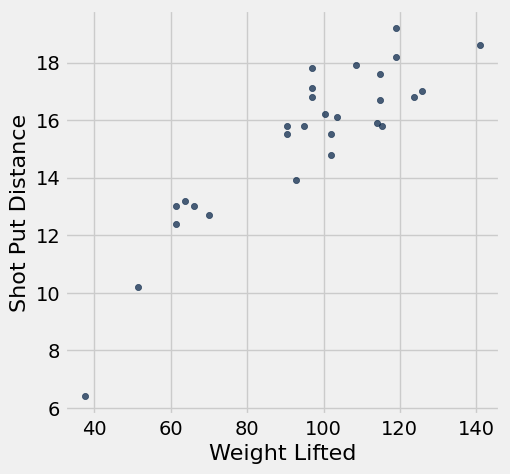

In [90]:
shotput.scatter('Weight Lifted')

In [91]:
def shotput_linear_rmse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = any_slope*x + any_intercept
    return np.mean((y - estimate) ** 2) ** 0.5

In [92]:
best_line = minimize(shotput_linear_rmse)
best_line

array([ 0.09834382,  5.95962883])

In [93]:
weights = shotput.column(0)

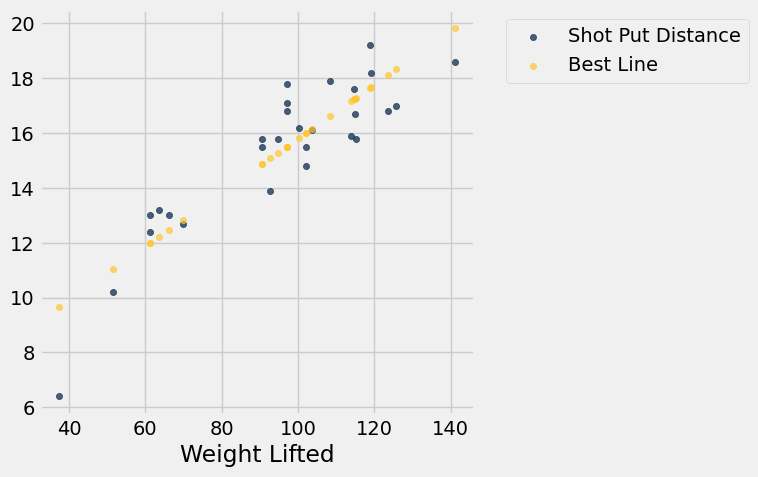

In [94]:
linear_fit = best_line.item(0)*weights + best_line.item(1)

shotput.with_column(
    'Best Line', linear_fit
).scatter(0)

**Quadratic Function**

$$
f(x) ~=~ ax^2 + bx + c
$$
for constants $a$, $b$, and $c$.



In [95]:
def shotput_quadratic_rmse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = a*(x**2) + b*x + c
    return np.mean((y - estimate) ** 2) ** 0.5

In [96]:
best_quad = minimize(shotput_quadratic_rmse)
best_quad

array([ -1.04003731e-03,   2.82706003e-01,  -1.53167618e+00])

In [97]:
# x = weight lifted = 100 kg
# Then predicted shot put distance:

(-0.00104)*(100**2) + 0.2827*100 - 1.5318

16.3382

In [98]:
quad_fit = best_quad.item(0)*(weights**2) + best_quad.item(1)*weights + best_quad.item(2)

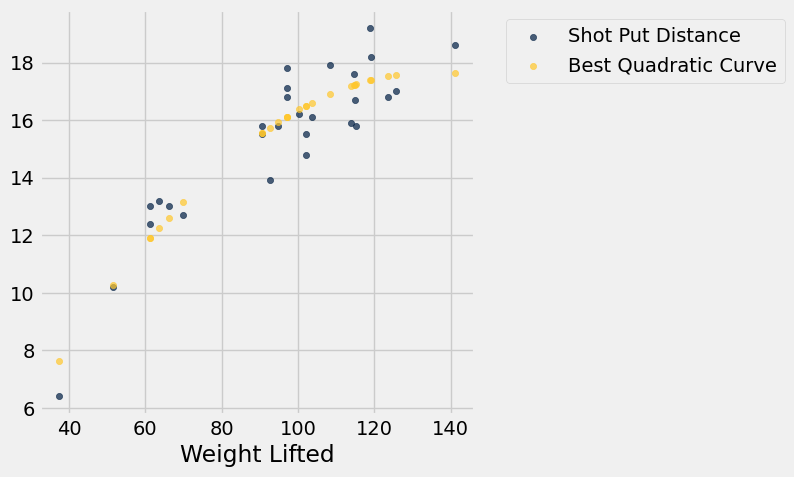

In [99]:
shotput.with_column('Best Quadratic Curve', quad_fit).scatter(0)

## Residuals

In [100]:
def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [101]:
demographics = demographics.with_columns(
    'Fitted Value', fitted_values(demographics, 'College%', 'Median Income'),
    'Residual', residuals(demographics, 'College%', 'Median Income')
)
demographics

Median Income,College%,Linear Prediction,Fitted Value,Residual
47083,24,51299.4,51299.4,-4216.42
42035,21.8,48503.9,48503.9,-6468.87
46544,22.8,49774.6,49774.6,-3230.58
41110,17,42404.5,42404.5,-1294.51
51690,30.3,59304.8,59304.8,-7614.84
61413,36.7,67437.3,67437.3,-6024.33
34664,19.4,45454.2,45454.2,-10790.2
76440,29.6,58415.3,58415.3,18024.7
50537,24.5,51934.8,51934.8,-1397.77
49072,34,64006.4,64006.4,-14934.4


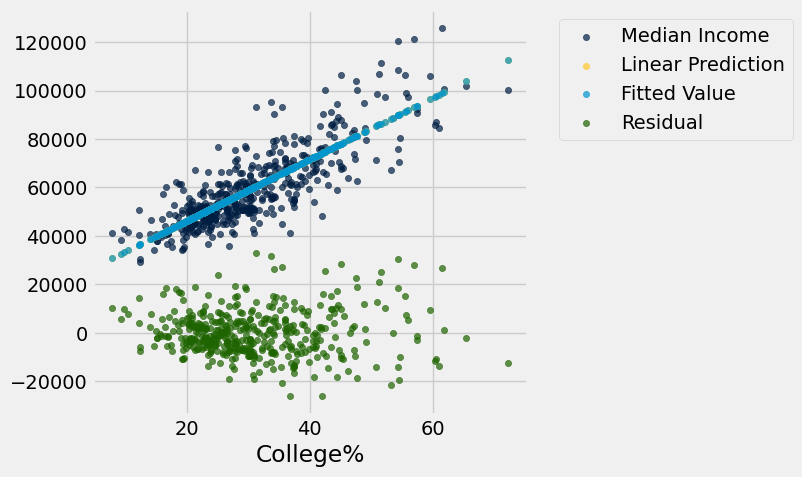

In [102]:
demographics.scatter('College%')

In [103]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual')

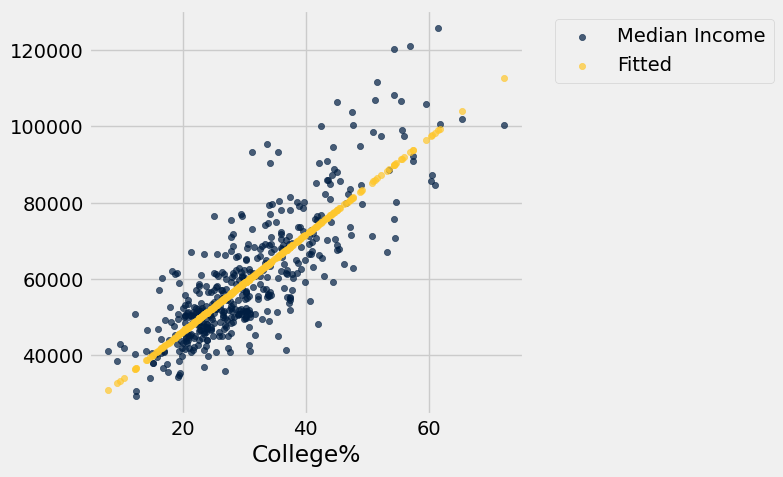

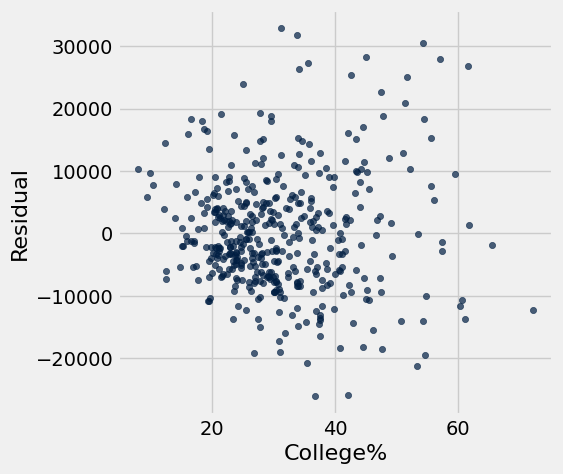

In [104]:
plot_residuals(demographics, 'College%', 'Median Income')

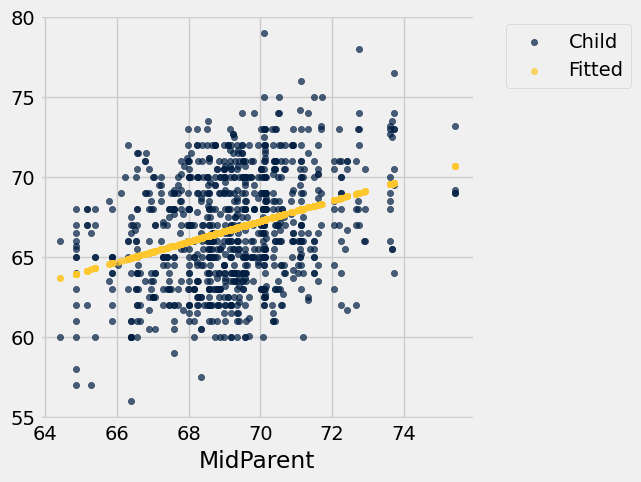

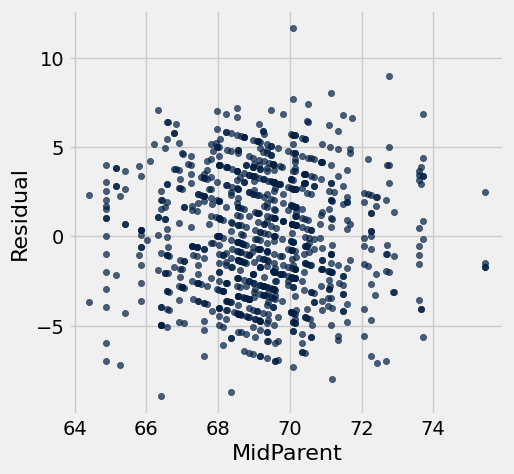

In [105]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
plot_residuals(heights, 'MidParent', 'Child')

## Dugongs ##

In [106]:
dugong = Table.read_table('dugong.csv')
dugong.show(5)

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5


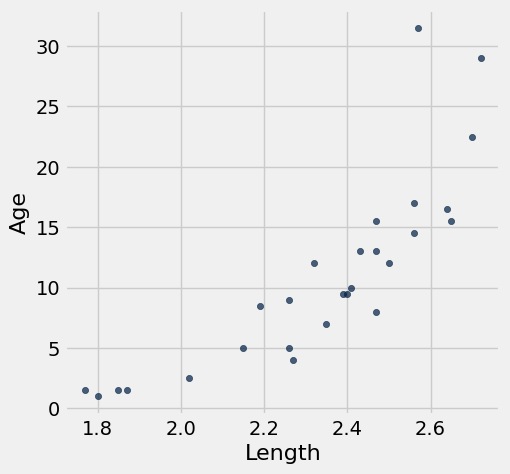

In [107]:
dugong.scatter('Length', 'Age')

In [108]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

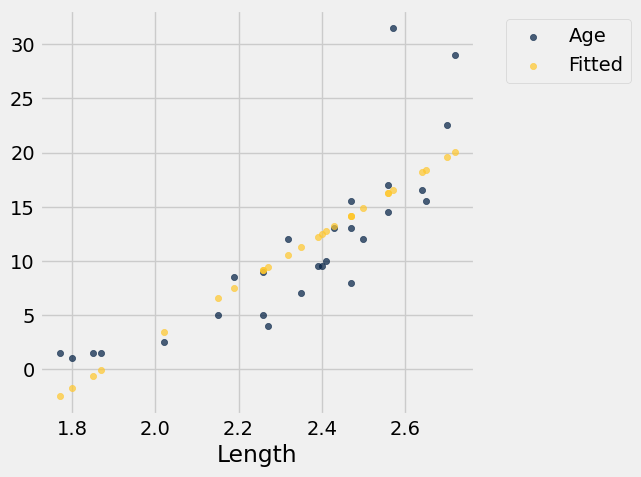

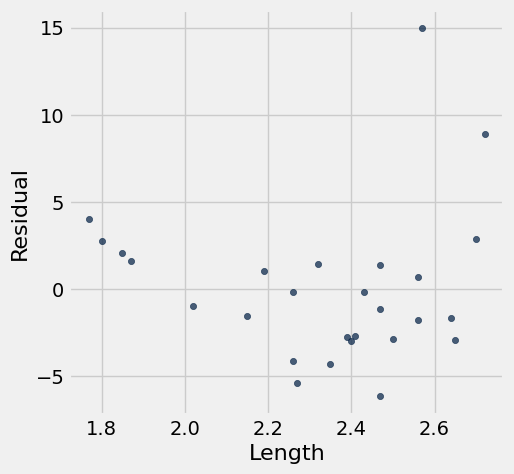

In [109]:
plot_residuals(dugong, 'Length', 'Age')

# US Women

In [110]:
us_women = Table.read_table('us_women.csv')
us_women.show(5)

height,ave weight
58,115
59,117
60,120
61,123
62,126


In [111]:
correlation(us_women, 'height', 'ave weight')

0.99549476778421608

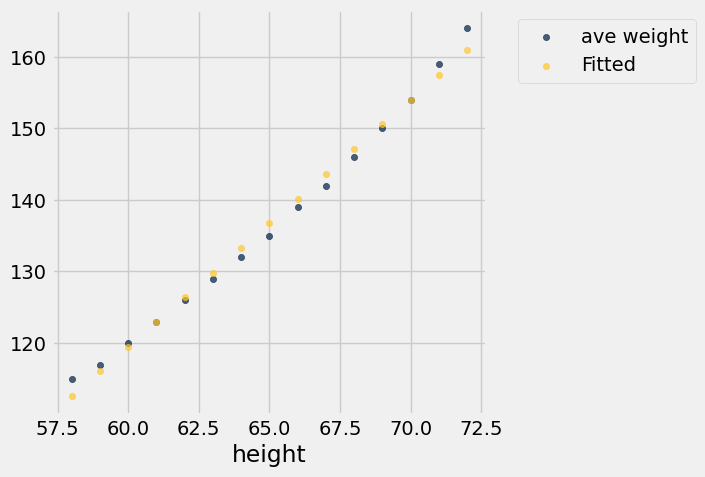

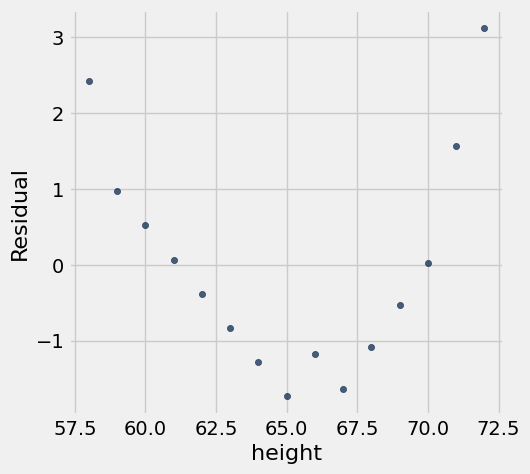

In [112]:
plot_residuals(us_women, 'height', 'ave weight')

## Average of Residuals ##

In [113]:
round(np.average(residuals(dugong, 'Length', 'Age')), 6)

0.0

In [114]:
round(np.average(residuals(heights, 'MidParent', 'Child')), 6)

0.0

In [115]:
round(np.average(residuals(demographics, 'College%', 'Median Income')), 6)

0.0

In [116]:
heights = heights.with_columns(
    'Residual', residuals(heights, 'MidParent', 'Child'),
    'Fitted Value', fitted_values(heights, 'MidParent', 'Child')
)


In [117]:
round(correlation(heights, 'MidParent', 'Residual'), 6)

-0.0

In [118]:
round(correlation(heights, 'Fitted Value', 'Residual'), 6)

-0.0

## A Measure of Clustering ##

In [ ]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

In [ ]:
plot_fitted(heights, 'MidParent', 'Child')

In [ ]:
child_predictions_sd = np.std(fitted_values(heights, 'MidParent', 'Child'))
child_observed_sd = np.std(heights.column('Child'))
print(child_predictions_sd)
print(child_observed_sd)

In [ ]:
child_predictions_sd / child_observed_sd

In [ ]:
correlation(heights, 'MidParent', 'Child')

In [ ]:
correlation(dugong, 'Length', 'Age')

In [ ]:
dugong_prediction_sd = np.std(fitted_values(dugong, 'Length', 'Age'))
dugong_observed_sd = np.std(dugong.column(1))
dugong_prediction_sd / dugong_observed_sd

In [ ]:
hybrid = Table.read_table('hybrid.csv')
hybrid.show(5)

In [ ]:
plot_residuals(hybrid, 'acceleration', 'mpg')

In [ ]:
correlation(hybrid, 'acceleration', 'mpg')

In [ ]:
np.std(fitted_values(hybrid, 'acceleration', 'mpg'))/np.std(hybrid.column('mpg'))

No matter what the shape of the scatter plot, the SD of the fitted values is a fraction of the SD of the observed values of $y$. The fraction is |r|.

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r| ~~~~~~~~~~ \mbox{That is,} ~~ \mbox{SD of fitted values} = |r|\cdot \mbox{SD of }y
$$

## SD of the Residuals ##
No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the observed values of $y$. The fraction is  $\sqrt{1-r^2}$.

$$
\mbox{SD of residuals} ~=~ \sqrt{1 - r^2} \cdot \mbox{SD of }y
$$

## Regression Model ##

In [119]:
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    errors = np.random.normal(0, 6, sample_size)
    y = (true_slope * x + true_int) + errors
    sample = Table().with_columns('x', x, 'y', y)

    sample.scatter('x', 'y')
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    sample.scatter('x', 'y')
    plots.title('What We Get to See')

    sample.scatter('x', 'y', fit_line=True)
    plots.title('Regression Line: Estimate of True Line')

    sample.scatter('x', 'y', fit_line=True)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")

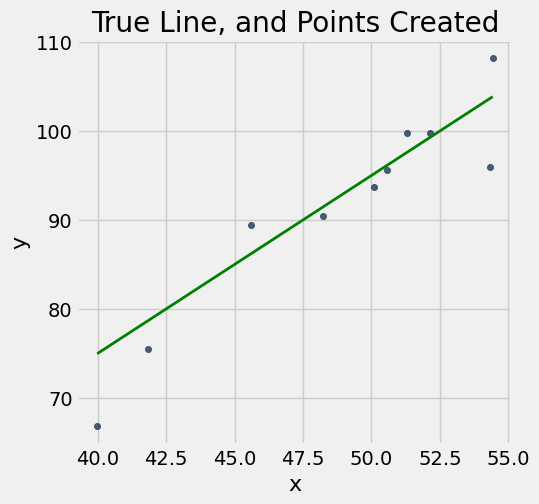

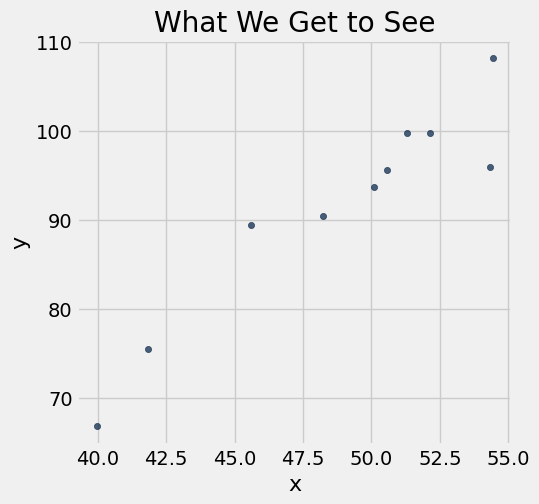

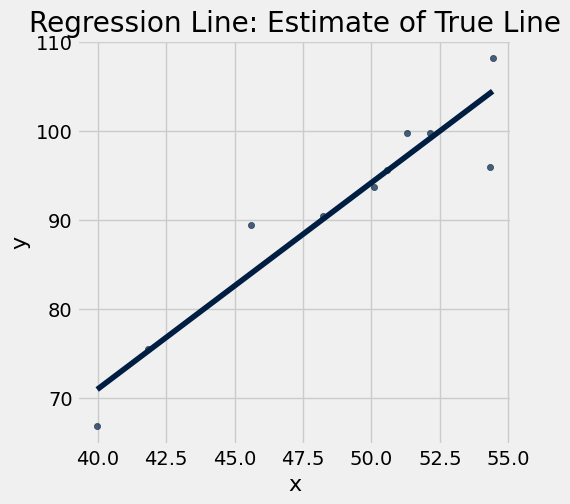

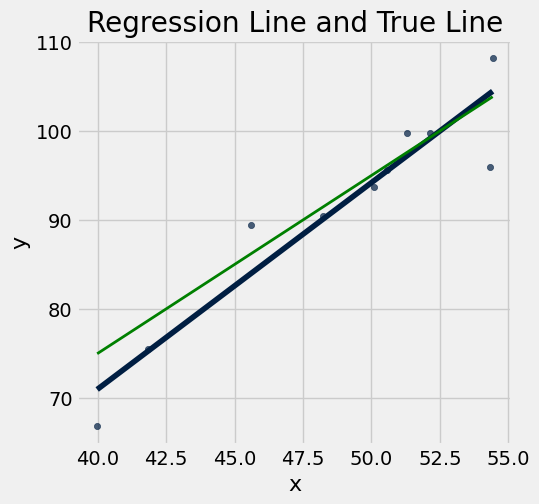

In [120]:
draw_and_compare(2, -5, 10)

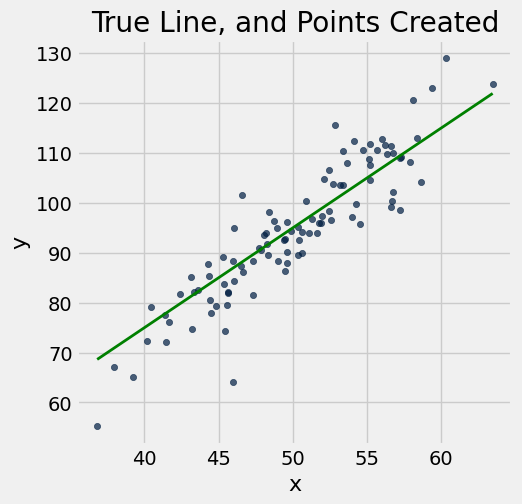

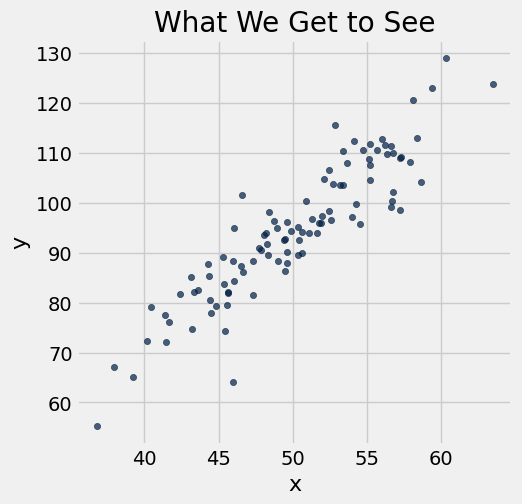

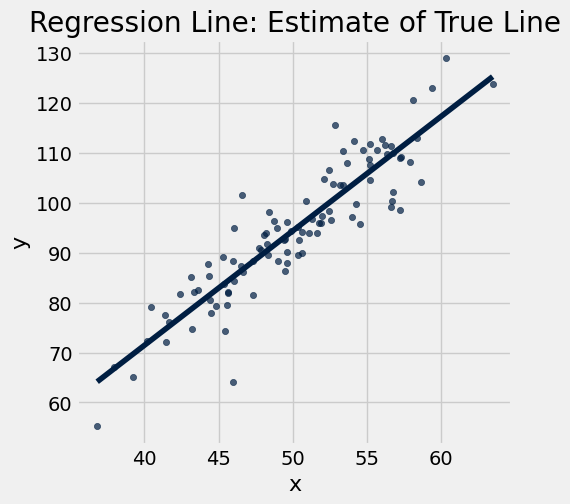

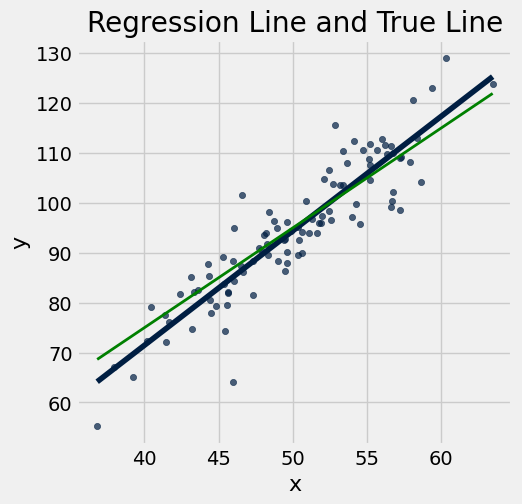

In [121]:
draw_and_compare(2, -5, 100)

## Prediction ##

In [122]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


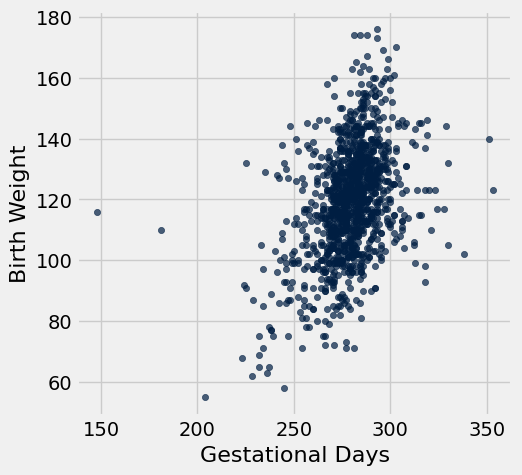

In [123]:
births.scatter('Gestational Days', 'Birth Weight')

In [124]:
births = births.where('Gestational Days', are.between(240, 320))

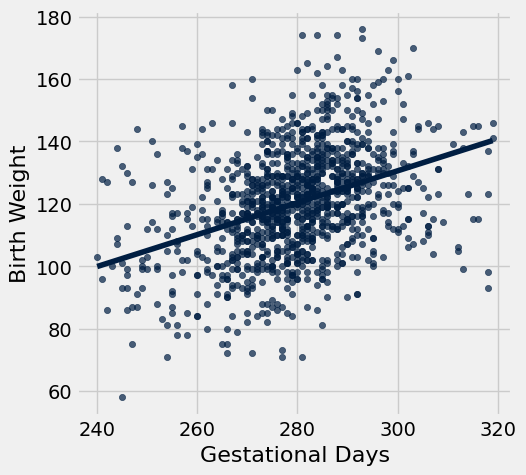

In [125]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [126]:
def prediction_at(t, x, y, x_value):
    '''
    t - table
    x - label of x column
    y - label of y column
    x_value - the x value for which we want to predict y
    '''
    return slope(t, x, y) * x_value + intercept(t, x, y)

In [127]:
prediction_at_300 = prediction_at(births, 'Gestational Days', 'Birth Weight', 300)
prediction_at_300

130.53859795467929

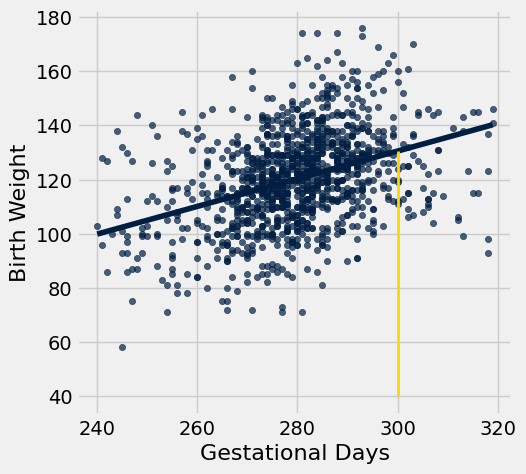

In [128]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='gold', lw=2);

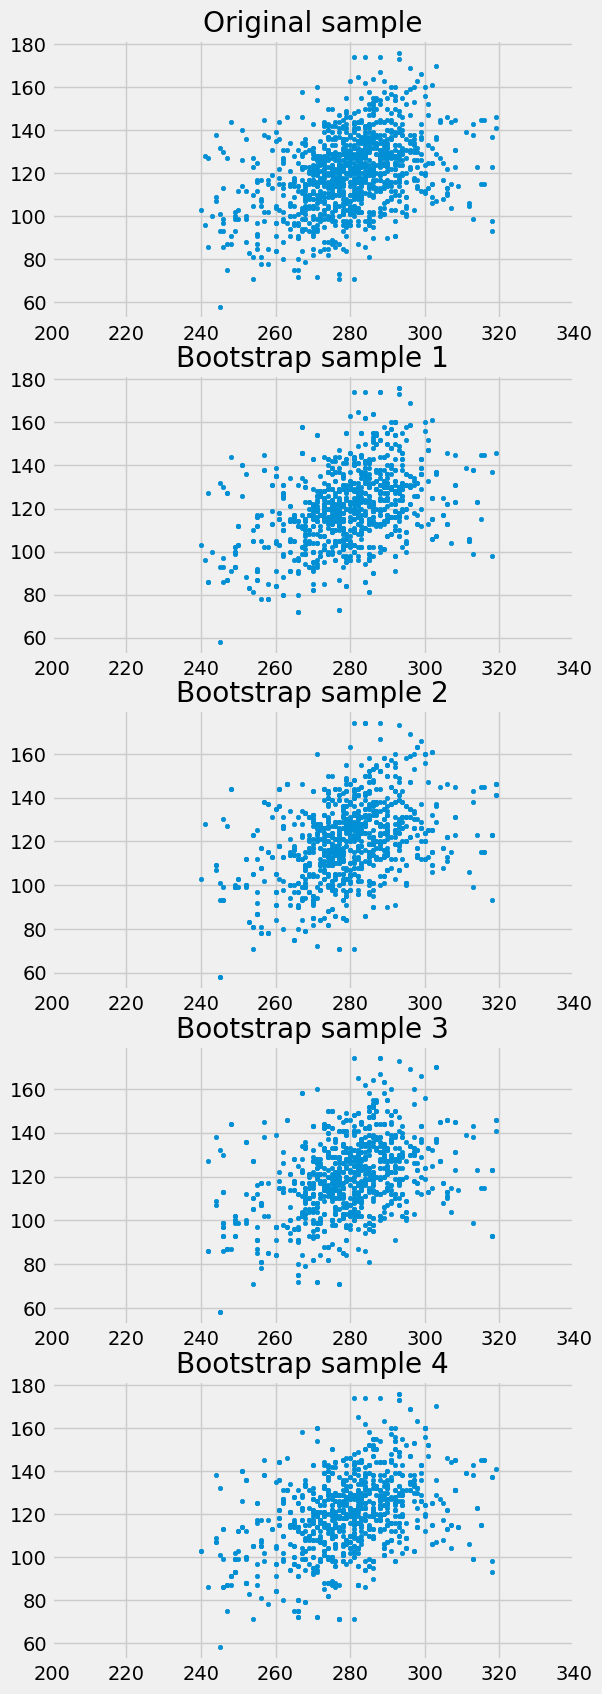

In [129]:
plots.figure(figsize=(6, 20))
plots.subplot(5, 1, 1)
plots.scatter(births[1], births[0], s=10)
plots.xlim([200, 340])
plots.title('Original sample')

for i in np.arange(1, 5, 1):
    plots.subplot(5,1,i+1)
    rep = births.sample()
    plots.scatter(rep[1], rep[0], s=10)
    plots.xlim([200, 340])
    plots.title('Bootstrap sample '+str(i))

Predicted y from bootstramp sample was 131.67666439
Predicted y from bootstramp sample was 130.662404921
Predicted y from bootstramp sample was 130.637736473
Predicted y from bootstramp sample was 132.638169489


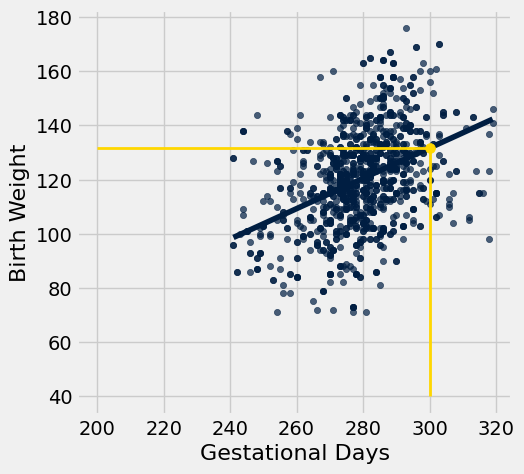

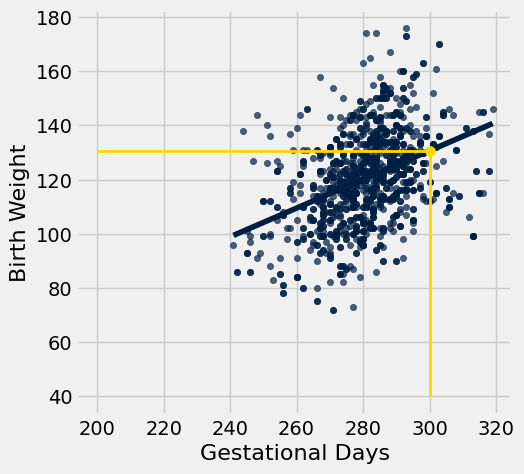

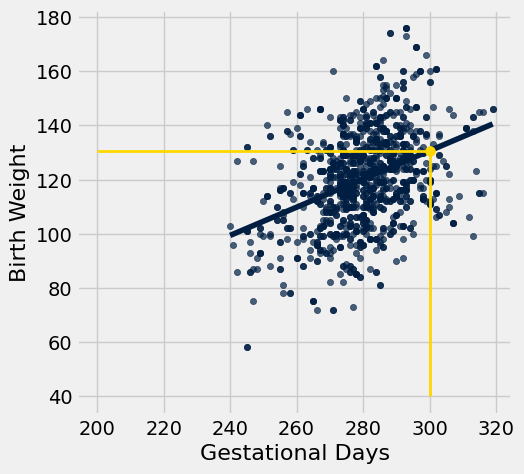

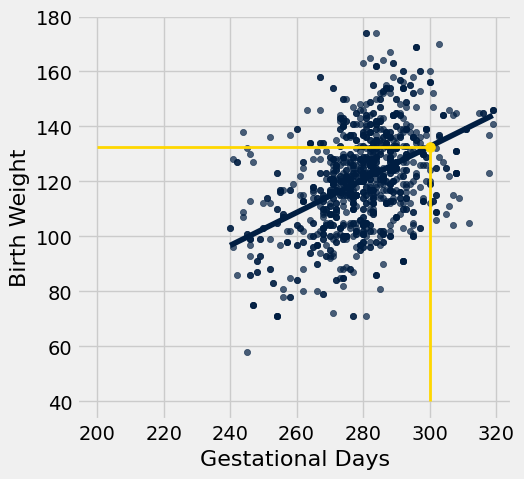

In [130]:
for i in np.arange(4):
    resample = births.sample()
    predicted_y = prediction_at(resample, 'Gestational Days', 'Birth Weight', 300)
    print('Predicted y from bootstramp sample was', predicted_y)
    resample.scatter('Gestational Days', 'Birth Weight', fit_line=True)
    plots.scatter(300, predicted_y, color='gold', s=50, zorder=3);
    plots.plot([x, x], [40, predicted_y], color='gold', lw=2);
    plots.plot([200, x], [predicted_y, predicted_y], color='gold', lw=2);

In [131]:
def bootstrap_prediction(t, x, y, new_x, repetitions=1000):

    # Bootstrap the scatter, predict, collect
    predictions = make_array()
    for i in np.arange(repetitions):
        resample = t.sample()
        predicted_y = prediction_at(resample, x, y, new_x)
        predictions = np.append(predictions, predicted_y)

    # Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)

    # Display results
    Table().with_column('Prediction', predictions).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Approximate 95%-confidence interval for height of true line:')
    print(left, right, '(width =', right - left, ')') 

Approximate 95%-confidence interval for height of true line:
128.671038316 132.479390552 (width = 3.80835223621 )


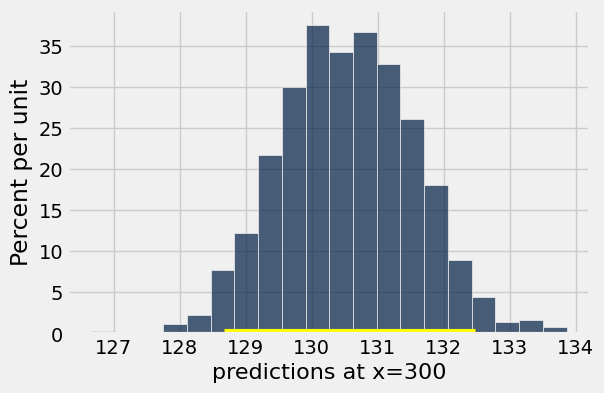

In [132]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 300)

## Predictions at Different Values of X

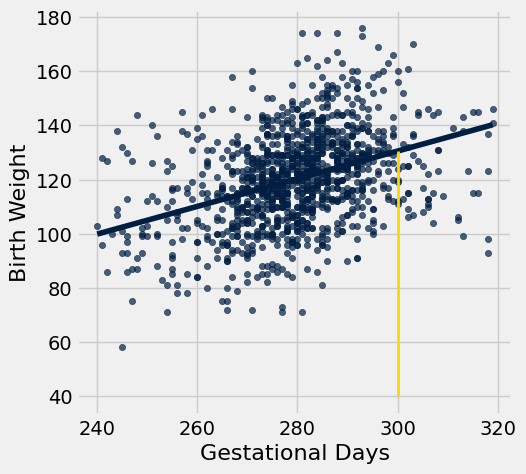

In [133]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='gold', lw=2);

Approximate 95%-confidence interval for height of true line:
78.4584941417 90.6183320911 (width = 12.1598379495 )


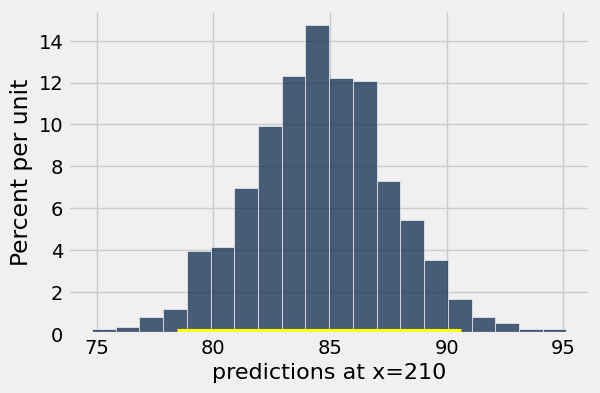

In [134]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 210)

Approximate 95%-confidence interval for height of true line:
119.450543775 121.257170988 (width = 1.80662721287 )


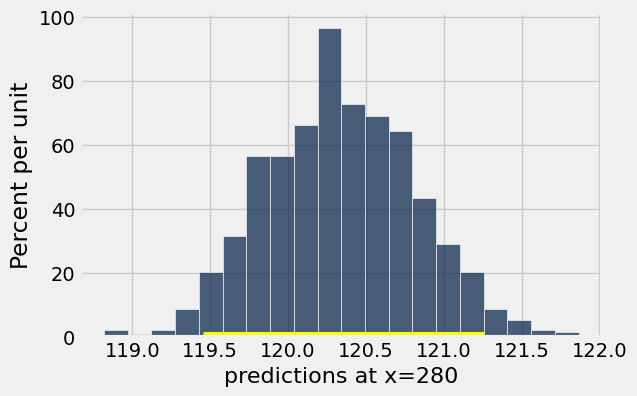

In [135]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 280)

In [136]:
np.mean(births.column('Gestational Days'))

279.72080772607552

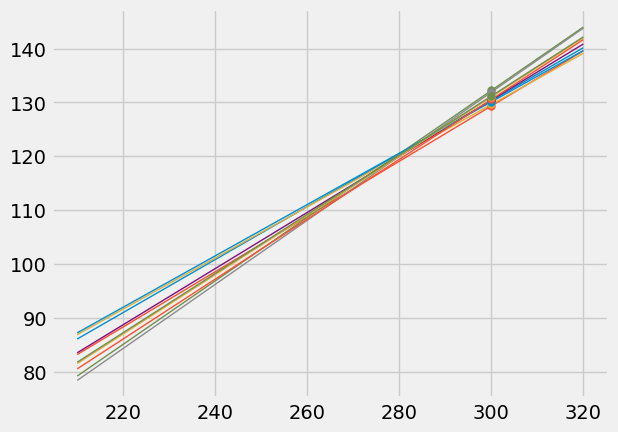

In [137]:
lines = Table(['slope','intercept', 'at 210', 'at 300', 'at 320'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 210 + b, a * 300 + b, a * 320 + b])

for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([210, 320], [line.item('at 210'), line.item('at 320')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30, zorder=3)

## Inference for the Slope ##

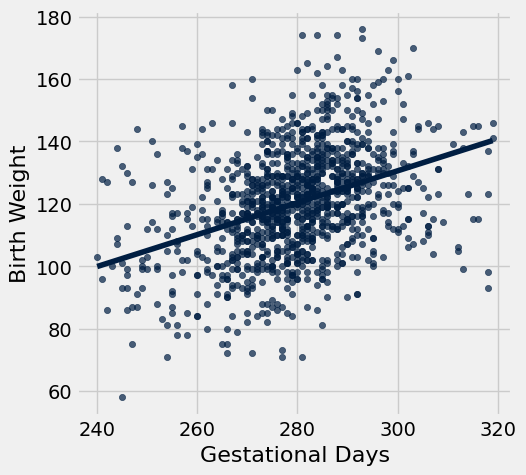

In [138]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [139]:
slope(births, 'Gestational Days', 'Birth Weight')

0.5110166711567975

In [140]:
def bootstrap_slope(t, x, y, repetitions=5000):
    
    # Bootstrap the scatter, find the slope, collect
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = t.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(t, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the slope of the true line:')
    print(left, 'to', right)

Slope of regression line: 0.511016671157
Approximate 95%-confidence interval for the slope of the true line:
0.428340215362 to 0.596848901471


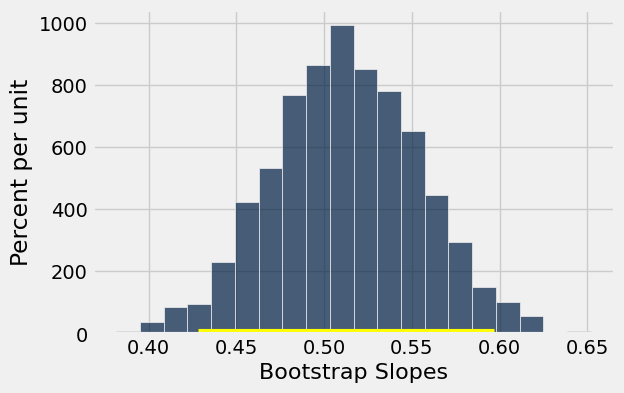

In [141]:
bootstrap_slope(births, 'Gestational Days', 'Birth Weight', 2500)

## Rain on the Regression Parade

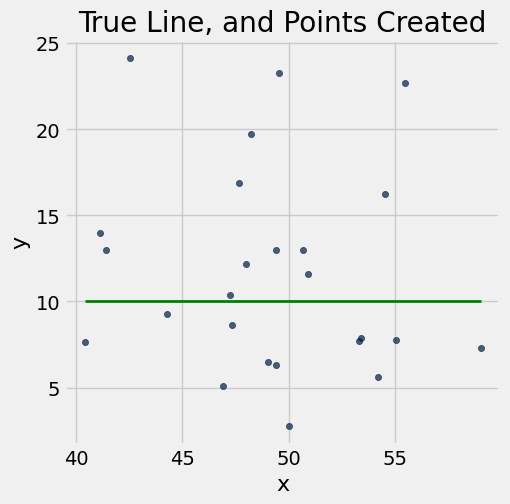

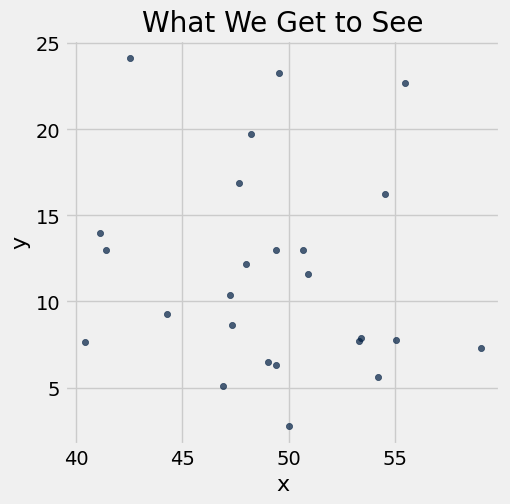

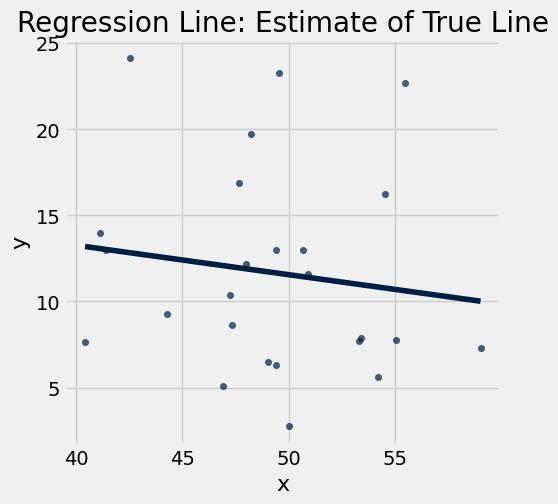

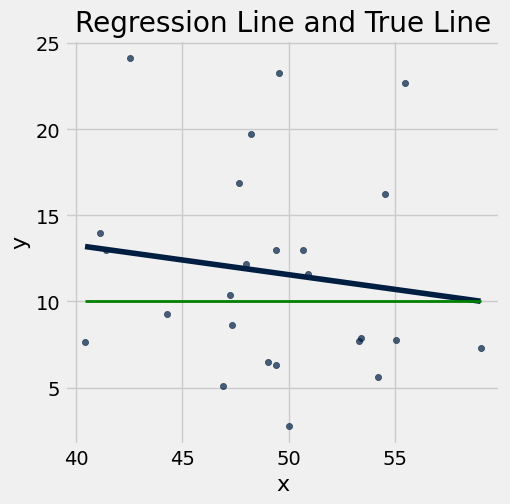

In [142]:
draw_and_compare(0, 10, 25)

**Null Hypothesis.** Slope of true line = 0.

**Alternative Hypothesis.** Slope of true line is not 0.

In [143]:
slope(births, 'Maternal Age', 'Birth Weight')

0.10714722656623907

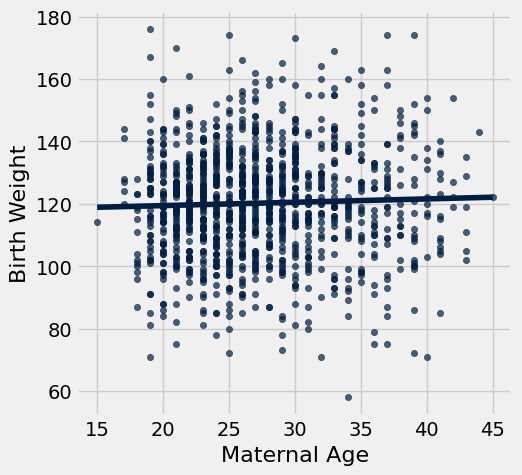

In [144]:
births.scatter('Maternal Age', 'Birth Weight', fit_line=True)

Slope of regression line: 0.107147226566
Approximate 95%-confidence interval for the slope of the true line:
-0.0739069898695 to 0.295023600202


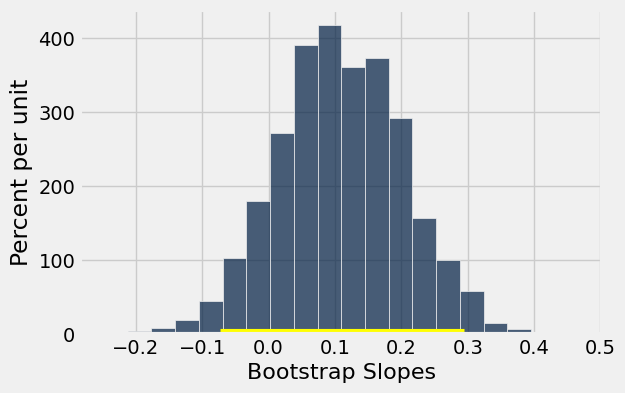

In [145]:
bootstrap_slope(births, 'Maternal Age', 'Birth Weight', 2500)

In [147]:
values = Table().with_columns('Name', make_array(1,2,3,4,5))
values

Name
1
2
3
4
5


In [155]:
values.with_column("Reshuffled", values.sample(with_replacement=True).column(0))

Name,Reshuffled
1,3
2,1
3,3
4,3
5,4
